# Lab 2 : 

## 4.2 - Cyclic tour

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
features = 2
cities = 10
hidden_nodes = 20

In [25]:
def get_data_cities(file='cities'):
    if file == 'cities':
        filename = "data/cities.dat"
        with open(filename) as f:
            lines = f.readlines()[4:]
            raw_data = [line.replace(";", '').replace('\n', '').split(",") for line in lines]
            data = np.array([ elem for singleList in raw_data for elem in singleList])
            data = np.reshape(data, (cities,features))
            data = data.astype(np.float)
        return data

In [26]:
def init_weights(size, sd=0.01):
    return np.random.normal(0, sd, size)

In [27]:
def neighborhood(ndx, epoch, max_range):
    nbrhd_range = int(2 - (epoch)//10)
    list_of_neighbors = [ndx]
    if(nbrhd_range==2):
        if(ndx-nbrhd_range < 0):
            list_of_neighbors.append(ndx-1)
            list_of_neighbors.append(ndx+1)
        elif(ndx+nbrhd_range >= 10):
            list_of_neighbors.append(0)    #(ndx+nbrhd_range)%10
            list_of_neighbors.append(ndx-1)
        else : 
            list_of_neighbors.append(ndx-1)
            list_of_neighbors.append(ndx+1)
    if(nbrhd_range==1):
        if(ndx+nbrhd_range > 10):
            list_of_neighbors.append(0)
        else:
            if(ndx==9):
                i=-1
            else:
                i=np.random.choice([-1,1])
            list_of_neighbors.append(ndx+i)       
    return list_of_neighbors

In [28]:
neighborhood(9, 25, hidden_nodes)

[9]

In [29]:
def train_SOM(inputs, weights, step_size=0.2, epochs=30, eta=0.2):
    for epoch in range(epochs):
        for cityNdx in range(cities):
            # Calculate similarity between input pattern and weights
            #  Ignore Sqrt since we only care about the winner
            similarity = np.sum(
                np.square(inputs[cityNdx,:]-weights), axis=1)
            # Select winner
            winner = np.argmin(similarity)
            # Update weights in neighborhood
            nbrs = neighborhood(winner, epoch, hidden_nodes)
            weights[nbrs,:] = weights[nbrs,:] + \
              eta*(inputs[cityNdx,:] - weights[nbrs,:])
    return weights

In [30]:
weights = init_weights((hidden_nodes, features))
inputs = get_data_cities()

In [31]:
w_trained = train_SOM(inputs, weights)

In [33]:
def plot_tour(inputs, weights):
    outputs = []
    for cityNdx in range(cities):
        similarity = np.sum(
            np.square(inputs[cityNdx,:] - weights), axis=1)
        indice = np.argmin(similarity)
        outputs.append(weights[indice,:])
    outputs.append(inputs[0,:])
    outputs = np.asarray(outputs)
    plt.scatter(inputs[:,0],inputs[:,1])
    plt.plot(outputs[:,0],outputs[:,1], color='red')

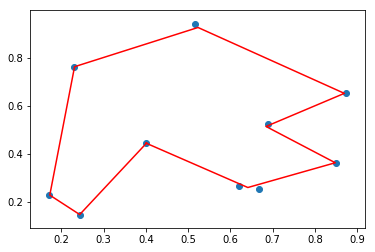

In [34]:
plot_tour(inputs, weights)

## 4.3 Data Clustering: Votes of MPs

In [ ]:
def get_data_votes(file='votes'):
    if file == 'votes':
        filename = "data/votes.dat"
        with open(filename) as f:
            lines = f.readlines()[4:]
            raw_data = [line.replace(";", '').replace('\n', '').split(",") for line in lines]
            data = np.array([ elem for singleList in raw_data for elem in singleList])
            data = np.reshape(data, (cities,features))
            data = data.astype(np.float)
        return data